In [172]:
import pandas as pd
import numpy as np

In [173]:
dataset = pd.read_csv('clean_dataset_stem.csv',sep=';') #mengambil dataset

In [174]:
dataset.shape #menampilkan ukuran dataset

(902, 10)

In [175]:
dataset.head() #menampilkan 5 data pertama

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,3,3,Covid belum nyampe prigen mbak hmm hoax,0.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak hmm hoax,covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
4,4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,nyuruh orang pintar lu aja togog itu kerumunan...,"['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...","['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog kerumun orang...


In [176]:
dataset_feature = dataset['ProcessedText'].astype(str) #mengambil kolom ProcessedText sebagai feature

#feature adalah kolom yang akan digunakan untuk melakukan klasifikasi

In [177]:
dataset_label = dataset['Sentimen'] #mengambil kolom Sentiment sebagai label

In [178]:
dataset_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [179]:
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

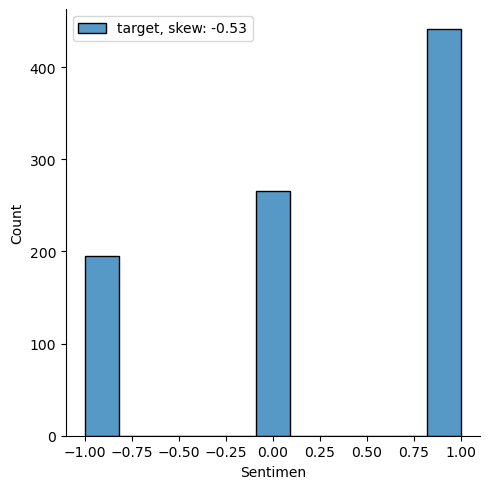

In [181]:
plt.figure(figsize=(15,10)) #membuat plot
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}') #membuat plot distribusi label
plt.legend(loc='best') #menampilkan legenda (legenda adalah label yang menunjukkan informasi tambahan pada plot)
plt.show() #menampilkan plot

In [182]:
dataset_label.value_counts()

Sentimen
 1.0    441
 0.0    266
-1.0    195
Name: count, dtype: int64

BOW

In [183]:
#BOW (Bag of Words) adalah metode yang digunakan untuk mengubah teks menjadi vektor numerik

In [184]:
from sklearn.feature_extraction.text import CountVectorizer


In [185]:
vectorizer = CountVectorizer() #membuat objek CountVectorizer


In [186]:
X = vectorizer.fit(dataset_feature) #mengubah dataset menjadi vektor numerik

In [187]:
print(vectorizer.get_feature_names_out ()) #menampilkan nama fitur



['aa' 'aamiin' 'aamiingimana' ... 'zmn' 'zona' 'zone']


In [188]:
X = vectorizer.transform(dataset_feature)
print(X.toarray())



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [189]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2)) 

#membuat objek CountVectorizer dengan parameter analyzer='word' dan ngram_range=(2, 2) 
#(analyzer adalah metode yang digunakan untuk mengubah teks menjadi vektor numerik, ngram adalah metode yang digunakan untuk mengubah teks menjadi vektor numerik)

Corpus

In [190]:
corpus = [
    'This is the best Entrepreneur ever.',
    'This is Alvino Radyo.',
    'And i will show u.',
    'How i create my own company?',
]

#membuat corpus (corpus adalah kumpulan teks)

In [191]:
vectorizer = CountVectorizer()

In [192]:
Z = vectorizer.fit_transform(corpus)

In [193]:
vectorizer.get_feature_names_out() #menampilkan nama fitur

array(['alvino', 'and', 'best', 'company', 'create', 'entrepreneur',
       'ever', 'how', 'is', 'my', 'own', 'radyo', 'show', 'the', 'this',
       'will'], dtype=object)

In [194]:
print(Z.toarray())

[[0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0]]


In [195]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [196]:
Z2 = vectorizer2.fit_transform(corpus) 

In [197]:
vectorizer2.get_feature_names_out()

array(['alvino radyo', 'and will', 'best entrepreneur', 'create my',
       'entrepreneur ever', 'how create', 'is alvino', 'is the', 'my own',
       'own company', 'the best', 'this is', 'will show'], dtype=object)

In [198]:
print(Z2.toarray())

[[0 0 1 0 1 0 0 1 0 0 1 1 0]
 [1 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 1 1 0 0 0]]
